In [2]:
import pandas as pd
import os

In [11]:
DIR = 'C:/Users/USER/Desktop/python/competition/CarCrashAnalysisAIContest/data/'
os.chdir(DIR)
os.getcwd()
data = pd.read_csv(DIR+'train.csv')
data

,sample_id,video_path,label
0,TRAIN_0000,./train/TRAIN_0000.mp4,7
1,TRAIN_0001,./train/TRAIN_0001.mp4,7
2,TRAIN_0002,./train/TRAIN_0002.mp4,0
3,TRAIN_0003,./train/TRAIN_0003.mp4,0
4,TRAIN_0004,./train/TRAIN_0004.mp4,1
...,...,...,...
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3
2694,TRAIN_2694,./train/TRAIN_2694.mp4,5
2695,TRAIN_2695,./train/TRAIN_2695.mp4,0
2696,TRAIN_2696,./train/TRAIN_2696.mp4,0


## Label Info.

13가지의 차량 충돌 상황 Class의 세부 정보

crash : 차량 충돌 여부 (No/Yes)<br>
ego-Involve : 본인 차량의 충돌 사고 연류 여부 (No/Yes)<br>
weather : 날씨 상황 (Normal/Snowy/Rainy)<br>
timing : 낮과 밤 (Day/Night)<br>
ego-Involve, weather, timing의 정보는 '차량 충돌 사고'가 일어난 경우에만 분석합니다.


|crash|ego-Invovle|weather|timing|label|
|------|---|---|---|---|
|No|-|-|-|0|
|Yes|Yes|Normal|Day|1|
|Yes|Yes|Normal|Night|2|
|Yes|Yes|Snowy|Day|3|
|Yes|Yes|Snowy|Night|4|
|Yes|Yes|Rainy|Day|5|
|Yes|Yes|Rainy|Night|6|
|Yes|No|Normal|Day|7|
|Yes|No|Normal|Night|8|
|Yes|No|Snowy|Day|9|
|Yes|No|Snowy|Night|10|
|Yes|No|Rainy|Day|11|
|Yes|No|Rainy|Night|12|


ego Involve -> 3D ConV<br>
weather,timing -> 2D Conv

<AxesSubplot:>

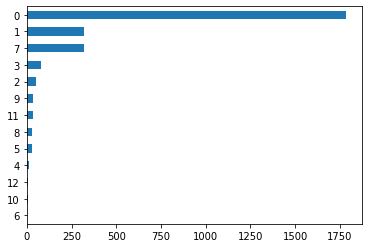

In [15]:
data['label'].value_counts().sort_values().plot(kind='barh')

In [1]:
import random
import pandas as pd
import numpy as np
import os
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.models as models

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, video_path_list, label_list):
        self.video_path_list = video_path_list
        self.label_list = label_list
        
    def __getitem__(self, index):
        frames = self.get_video(self.video_path_list[index])
        
        if self.label_list is not None:
            label = self.label_list[index]
            return frames, label
        else:
            return frames
        
    def __len__(self):
        return len(self.video_path_list)
    
    def get_video(self, path):
        frames = []
        cap = cv2.VideoCapture(path)
        for _ in range(CFG['VIDEO_LENGTH']):
            _, img = cap.read()
            img = cv2.resize(img, (CFG['IMG_SIZE'], CFG['IMG_SIZE']))
            img = img / 255.
            frames.append(img)
        return torch.FloatTensor(np.array(frames)).permute(3, 0, 1, 2)